# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_rows',10)

In [2]:
datapath ='/home/tk_conda/Documents/Shoriya/DataScience/datascience-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(datapath)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [4]:
time_idx=pd_raw.columns[4:]
dataframe_time_idx = pd.DataFrame({'date':time_idx})
dataframe_time_idx.head()
pd=pd_raw.head()
pd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


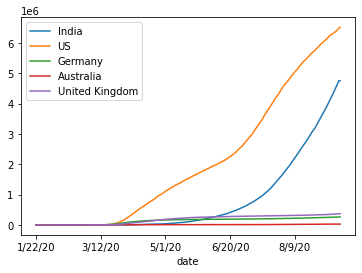

In [5]:
pd_raw.iloc[:,4::].sum(axis=0)
country_list = ['India','US','Germany','Australia','United Kingdom']
for each in country_list:
    dataframe_time_idx[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))
dataframe_time_idx
dataframe_time_idx.set_index('date').plot()

# Data Type date

In [6]:
datetime.strptime(dataframe_time_idx.date[0],'%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [7]:
time_idx = [datetime.strptime(each,'%m/%d/%y')for each in dataframe_time_idx.date]
time_str = [each.strftime('%Y-%m-%d')for each in time_idx]


In [8]:
dataframe_time_idx['date']=time_idx
type(dataframe_time_idx['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
dataframe_time_idx.head()

,date,India,US,Germany,Australia,United Kingdom
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,4,0


In [10]:
dataframe_time_idx.to_csv('../data/processed/COVID_small_dataset.csv',sep=';',index=False)

# Relational data model - defining primary key

In [11]:
import pandas as pd
datapath ='/home/tk_conda/Documents/Shoriya/DataScience/datascience-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(datapath)

pd_data_base= pd_raw.rename(columns={'Country/Region':'country',
                                    'Province/State':'states'})
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()


,states,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [12]:
test_pd=pd_data_base.set_index(['states','country']).T
test_pd=test_pd.stack(level=[0,1]).reset_index()
test_pd=test_pd.rename(columns={'level_0':'date',
                               0:'confirmed_cases'})
test_pd

,date,states,country,confirmed_cases
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
106667,9/13/20,Zhejiang,West Bank and Gaza,30574.0
106668,9/13/20,Zhejiang,Western Sahara,10.0
106669,9/13/20,Zhejiang,Yemen,2011.0
106670,9/13/20,Zhejiang,Zambia,13539.0


In [13]:
test_pd.to_csv('../data/processed/COVID_Relational_confirmed.csv',sep=';',index=False)

# Group by apply 

In [14]:
pd_JH_data=pd.read_csv('../data/processed/COVID_Relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,states,country,confirmed_cases
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cuba,0.0
2,2020-01-22,Zhejiang,Croatia,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0


In [15]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                    (pd_JH_data['country']=='Germany'))&
                    (pd_JH_data['date']>'2020-03-20')]

In [16]:
test_data

,date,states,country,confirmed_cases
26701,2020-03-21,Zhejiang,Germany,22213.0
26822,2020-03-21,Zhejiang,US,24508.0
26911,2020-03-21,NaN,Germany,22213.0
27031,2020-03-21,NaN,US,24508.0
27153,2020-03-22,Zhejiang,Germany,24873.0
...,...,...,...,...
106130,2020-09-12,NaN,US,6485123.0
106254,2020-09-13,Zhejiang,Germany,261737.0
106372,2020-09-13,Zhejiang,US,6519573.0
106462,2020-09-13,NaN,Germany,261737.0


In [17]:
test_data.groupby(['country']).agg(np.max)

,date,confirmed_cases
country,,
Germany,2020-09-13,261737.0
US,2020-09-13,6519573.0


In [18]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    #assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

the test slope is: [2.]


In [19]:
test_data.groupby(['states','country']).agg(np.max)


date  confirmed_cases
states   country                            
Zhejiang Germany 2020-09-13         261737.0
         US      2020-09-13        6519573.0

In [20]:
def rolling_reg(df_input,col='confirmed_cases'):
    ''' Rolling Regression to approximate the doubling time'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result

In [21]:
test_data[['states','country','confirmed_cases']].groupby(['states','country']).apply(rolling_reg,'confirmed_cases')

states    country        
Zhejiang  Germany  26701            NaN
                   27153            NaN
                   27606       7.417994
                   28059       7.142035
                   28509       8.012983
                                ...    
          US       104567    212.427622
                   105018    184.137066
                   105471    153.403356
                   105922    144.718219
                   106372    170.777062
Name: confirmed_cases, Length: 354, dtype: float64

In [22]:
pd_DR_result= pd_JH_data[['states','country','confirmed_cases']].groupby(['states','country']).apply(rolling_reg,'confirmed_cases').reset_index()

In [23]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed_cases':'doubling_rate',
                                          'level_2':'index'})
pd_DR_result.head()

,states,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1704,NaN
4,Alberta,Canada,2157,NaN


In [24]:
pd_JH_data.reset_index().head()

,index,date,states,country,confirmed_cases
0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,2020-01-22,Zhejiang,Cuba,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0


In [25]:
pd_result_large=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],left_index=True,right_index=True,how='left')
pd_result_large    

,date,states,country,confirmed_cases,index,doubling_rate
0,2020-01-22,NaN,Afghanistan,0.0,351.0,NaN
1,2020-01-22,Zhejiang,Cuba,0.0,801.0,NaN
2,2020-01-22,Zhejiang,Croatia,0.0,1252.0,NaN
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,1704.0,NaN
4,2020-01-22,Zhejiang,Costa Rica,0.0,2157.0,NaN
...,...,...,...,...,...,...
106667,2020-09-13,NaN,San Marino,722.0,NaN,NaN
106668,2020-09-13,NaN,Saint Vincent and the Grenadines,64.0,NaN,NaN
106669,2020-09-13,NaN,Saint Lucia,27.0,NaN,NaN
106670,2020-09-13,NaN,Timor-Leste,27.0,NaN,NaN


# Filtering the data with groupby apply

In [26]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept) '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result


In [27]:
pd_filtered_result= pd_JH_data[['states','country','confirmed_cases']].groupby(['states','country']).apply(savgol_filter,'confirmed_cases').reset_index()

In [28]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_cases_filtered']],on=['index'],right_index=True,how='left')
pd_result_large    

,date,states,country,confirmed_cases,index,doubling_rate,confirmed_cases_filtered
0,2020-01-22,NaN,Afghanistan,0.0,351.0,NaN,0.0
1,2020-01-22,Zhejiang,Cuba,0.0,801.0,NaN,0.0
2,2020-01-22,Zhejiang,Croatia,0.0,1252.0,NaN,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,1704.0,NaN,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0,2157.0,NaN,0.0
...,...,...,...,...,...,...,...
106667,2020-09-13,NaN,San Marino,722.0,NaN,NaN,NaN
106668,2020-09-13,NaN,Saint Vincent and the Grenadines,64.0,NaN,NaN,NaN
106669,2020-09-13,NaN,Saint Lucia,27.0,NaN,NaN,NaN
106670,2020-09-13,NaN,Timor-Leste,27.0,NaN,NaN,NaN


# Filtered doubling rate

In [29]:
pd_filtered_doubling=pd_result_large[['states','country','confirmed_cases_filtered']].groupby(['states','country']).apply(rolling_reg,'confirmed_cases_filtered').reset_index()


In [30]:
pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_cases_filtered':'doubling_rate_filtered',
                                          'level_2':'index'})
pd_filtered_doubling.head()

,states,country,index,doubling_rate_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,0.788422
3,Alberta,Canada,1704,-4.556000
4,Alberta,Canada,2157,-0.666667


In [31]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],right_index=True,how='left')
pd_result_large    

,date,states,country,confirmed_cases,index,doubling_rate,confirmed_cases_filtered,doubling_rate_filtered
0,2020-01-22,NaN,Afghanistan,0.0,351.0,NaN,0.0,-0.685233
1,2020-01-22,Zhejiang,Cuba,0.0,801.0,NaN,0.0,-0.892612
2,2020-01-22,Zhejiang,Croatia,0.0,1252.0,NaN,0.0,2.417048
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,1704.0,NaN,0.0,NaN
4,2020-01-22,Zhejiang,Costa Rica,0.0,2157.0,NaN,0.0,2.040479
...,...,...,...,...,...,...,...,...
106667,2020-09-13,NaN,San Marino,722.0,NaN,NaN,NaN,NaN
106668,2020-09-13,NaN,Saint Vincent and the Grenadines,64.0,NaN,NaN,NaN,NaN
106669,2020-09-13,NaN,Saint Lucia,27.0,NaN,NaN,NaN,NaN
106670,2020-09-13,NaN,Timor-Leste,27.0,NaN,NaN,NaN,NaN


In [32]:
mask=pd_result_large['confirmed_cases']>100
pd_result_large['doubling_rate_filtered']=pd_result_large['doubling_rate_filtered'].where(mask,other=np.NaN)
pd_result_large.head()

,date,states,country,confirmed_cases,index,doubling_rate,confirmed_cases_filtered,doubling_rate_filtered
0,2020-01-22,NaN,Afghanistan,0.0,351.0,NaN,0.0,NaN
1,2020-01-22,Zhejiang,Cuba,0.0,801.0,NaN,0.0,NaN
2,2020-01-22,Zhejiang,Croatia,0.0,1252.0,NaN,0.0,NaN
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,1704.0,NaN,0.0,NaN
4,2020-01-22,Zhejiang,Costa Rica,0.0,2157.0,NaN,0.0,NaN


In [33]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)